## Fetch California Housing

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

2023-09-19 10:32:52.326241: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from sklearn.datasets import fetch_california_housing 
housing = fetch_california_housing()

In [3]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

### Splitting the dataset

In [4]:
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test = train_test_split(housing.data,housing.target,random_state=42)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,random_state=42)

### Standardizing the data

In [5]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)
X_valid = scalar.fit_transform(X_valid)

In [6]:
np.random.seed(42)
tf.random.set_seed(42)

In [7]:
X_train.shape

(11610, 8)

### Model creation and training

In [8]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=[8]), #Hidden layer 1
    keras.layers.Dense(30,activation="relu"), # Hidden layer 2
    keras.layers.Dense(1) # Output layer
    
])

2023-09-19 10:32:54.559485: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss="mean_squared_error",
             optimizer=keras.optimizers.SGD(lr=1e-3), # learning rate = 0.01
             metrics=['mae'])

/Users/maddhujasen27/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [11]:
model_history = model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 1s 920us/step - loss: 1.7561 - mae: 0.9356 - val_loss: 0.7535 - val_mae: 0.6599
Epoch 2/20
363/363 [==============================] - 0s 668us/step - loss: 0.6832 - mae: 0.6193 - val_loss: 0.6513 - val_mae: 0.6083
Epoch 3/20
363/363 [==============================] - 0s 665us/step - loss: 0.6111 - mae: 0.5788 - val_loss: 0.5987 - val_mae: 0.5753
Epoch 4/20
363/363 [==============================] - 0s 660us/step - loss: 0.5602 - mae: 0.5509 - val_loss: 0.5691 - val_mae: 0.5649
Epoch 5/20
363/363 [==============================] - 0s 656us/step - loss: 0.5235 - mae: 0.5303 - val_loss: 0.5309 - val_mae: 0.5371
Epoch 6/20
363/363 [==============================] - 0s 651us/step - loss: 0.4934 - mae: 0.5138 - val_loss: 0.5105 - val_mae: 0.5285
Epoch 7/20
363/363 [==============================] - 0s 653us/step - loss: 0.4716 - mae: 0.5008 - val_loss: 0.4915 - val_mae: 0.5174
Epoch 8/20
363/363 [==============================] - 0s 654us

### Testing the model

In [12]:
mae_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 438us/step - loss: 0.3976 - mae: 0.4618


In [13]:
model_history.history

{'loss': [1.75611412525177,
  0.6831738352775574,
  0.6110541820526123,
  0.5601649284362793,
  0.523456871509552,
  0.49343472719192505,
  0.47163665294647217,
  0.4544273018836975,
  0.4411705732345581,
  0.43086832761764526,
  0.42270150780677795,
  0.4158627390861511,
  0.41047006845474243,
  0.4057270288467407,
  0.4018551707267761,
  0.3983984589576721,
  0.39547568559646606,
  0.39324527978897095,
  0.3904527723789215,
  0.38851210474967957],
 'mae': [0.9355728030204773,
  0.6192571520805359,
  0.5787954926490784,
  0.5509465932846069,
  0.5303162336349487,
  0.5137506127357483,
  0.5008249282836914,
  0.4906061589717865,
  0.4826012849807739,
  0.4760717749595642,
  0.46993717551231384,
  0.4656246602535248,
  0.4622403085231781,
  0.4585593044757843,
  0.45602983236312866,
  0.4543728828430176,
  0.4518556296825409,
  0.450160950422287,
  0.4481920003890991,
  0.4469291567802429],
 'val_loss': [0.7535314559936523,
  0.6513015031814575,
  0.5987298488616943,
  0.569064319133758

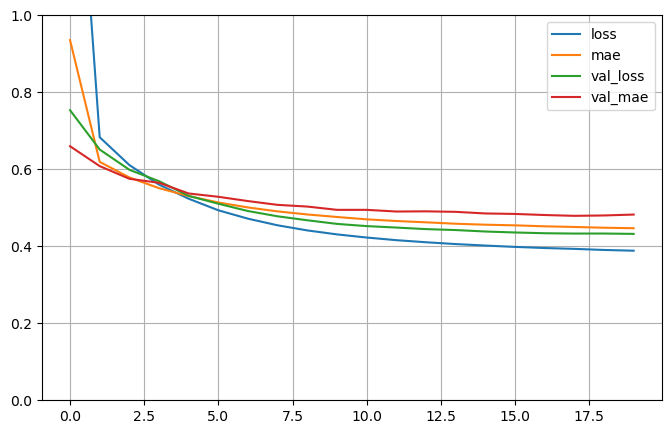

In [14]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [15]:
X_new = X_test[:3]
X_new

array([[-1.14772246, -0.3014276 , -0.46356103, -0.13026842, -0.0249129 ,
         0.56243986,  0.22075674,  0.2580042 ],
       [-0.69738315,  0.09834786, -0.14086589,  0.17205266,  0.13229717,
        -0.17390163, -0.20888265,  0.0337006 ],
       [-0.19475766,  1.85735988, -0.54547279,  0.15860488, -0.09942866,
        -0.98514082,  1.03333558, -1.45168768]])

### Making predictions

In [16]:
y_pred = model.predict(X_new)
print(y_pred)
y_test[:3]

1/1 [==============================] - 0s 48ms/step
[[0.667198 ]
 [1.6988816]
 [4.0995355]]


array([0.477  , 0.458  , 5.00001])

In [17]:
del model

In [18]:
keras.backend.clear_session()

## Functional API

In [19]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation="relu")(input_)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)
concat=keras.layers.concatenate([input_,hidden2])
output=keras.layers.Dense(1)(concat)
model=keras.models.Model(inputs=[input_],outputs=[output])

In [20]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

In [21]:
model.compile(loss="mean_squared_error",
             optimizer=keras.optimizers.SGD(lr=1e-3), # learning rate = 0.01
             metrics=['mae'])

In [22]:
model_history = model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 0s 880us/step - loss: 2.1800 - mae: 1.0226 - val_loss: 0.7512 - val_mae: 0.6174
Epoch 2/20
363/363 [==============================] - 0s 665us/step - loss: 0.7056 - mae: 0.6102 - val_loss: 0.6667 - val_mae: 0.6029
Epoch 3/20
363/363 [==============================] - 0s 664us/step - loss: 0.6286 - mae: 0.5806 - val_loss: 0.6195 - val_mae: 0.5743
Epoch 4/20
363/363 [==============================] - 0s 667us/step - loss: 0.5855 - mae: 0.5557 - val_loss: 0.5894 - val_mae: 0.5642
Epoch 5/20
363/363 [==============================] - 0s 671us/step - loss: 0.5511 - mae: 0.5371 - val_loss: 0.5577 - val_mae: 0.5450
Epoch 6/20
363/363 [==============================] - 0s 664us/step - loss: 0.5215 - mae: 0.5220 - val_loss: 0.5385 - val_mae: 0.5357
Epoch 7/20
363/363 [==============================] - 0s 665us/step - loss: 0.4996 - mae: 0.5089 - val_loss: 0.5198 - val_mae: 0.5250
Epoch 8/20
363/363 [==============================] - 0s 695us

In [23]:
mae_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 436us/step - loss: 0.4030 - mae: 0.4620


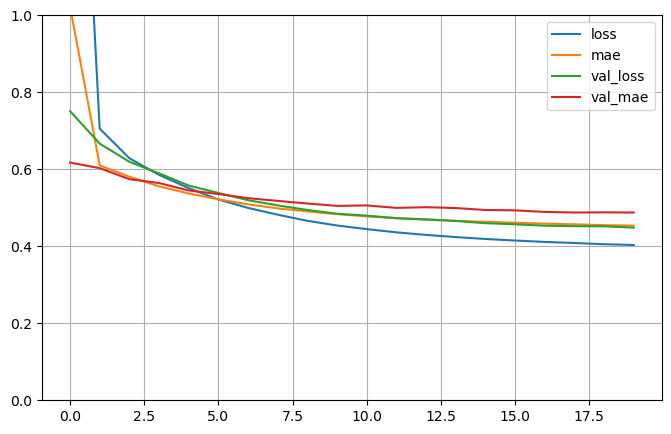

In [24]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [25]:
X_new = X_test[:3]
X_new

array([[-1.14772246, -0.3014276 , -0.46356103, -0.13026842, -0.0249129 ,
         0.56243986,  0.22075674,  0.2580042 ],
       [-0.69738315,  0.09834786, -0.14086589,  0.17205266,  0.13229717,
        -0.17390163, -0.20888265,  0.0337006 ],
       [-0.19475766,  1.85735988, -0.54547279,  0.15860488, -0.09942866,
        -0.98514082,  1.03333558, -1.45168768]])

In [26]:
y_pred = model.predict(X_new)
print(y_pred)
y_test[:3]

1/1 [==============================] - 0s 35ms/step
[[0.5811154]
 [1.9563155]
 [3.885494 ]]


array([0.477  , 0.458  , 5.00001])

### Optimizing the model

In [27]:
del model

In [28]:
keras.backend.clear_session()

In [29]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=[8]), #Hidden layer 1
    keras.layers.Dense(30,activation="relu"), # Hidden layer 2
    keras.layers.Dense(1) # Output layer
    
])

In [30]:
model.compile(loss="mean_squared_error",
             optimizer=keras.optimizers.SGD(lr=1e-3), metrics=['mae'])

In [31]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("early_stop_model.h5",save_best_only=True)

In [32]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
#patience - the number of epochs considered with no improvement

In [33]:
model_history = model.fit(X_train,y_train,epochs=200,validation_data=(X_valid,y_valid),
                         callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/200
363/363 [==============================] - 0s 897us/step - loss: 2.2608 - mae: 1.0819 - val_loss: 1.0454 - val_mae: 0.7597
Epoch 2/200
363/363 [==============================] - 0s 681us/step - loss: 0.8926 - mae: 0.7011 - val_loss: 0.7643 - val_mae: 0.6604
Epoch 3/200
363/363 [==============================] - 0s 678us/step - loss: 0.7323 - mae: 0.6405 - val_loss: 0.7034 - val_mae: 0.6249
Epoch 4/200
363/363 [==============================] - 0s 676us/step - loss: 0.6752 - mae: 0.6124 - val_loss: 0.6735 - val_mae: 0.6187
Epoch 5/200
363/363 [==============================] - 0s 678us/step - loss: 0.6313 - mae: 0.5912 - val_loss: 0.6350 - val_mae: 0.5964
Epoch 6/200
363/363 [==============================] - 0s 674us/step - loss: 0.5924 - mae: 0.5719 - val_loss: 0.6060 - val_mae: 0.5822
Epoch 7/200
363/363 [==============================] - 0s 675us/step - loss: 0.5582 - mae: 0.5535 - val_loss: 0.5778 - val_mae: 0.5669
Epoch 8/200
363/363 [==============================] - 

In [34]:
model = keras.models.load_model("early_stop_model.h5")

In [35]:
mae_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 454us/step - loss: 0.3685 - mae: 0.4325


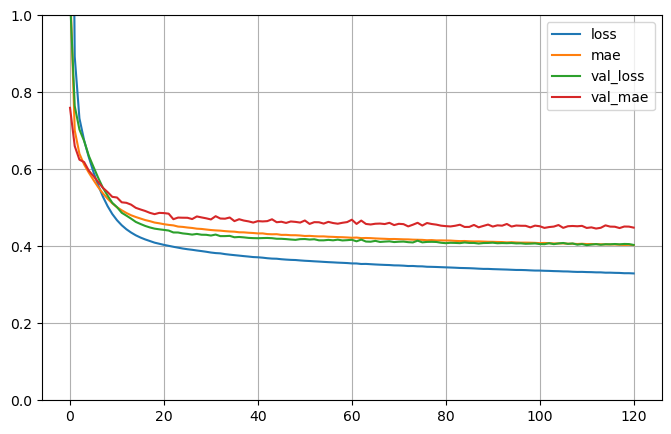

In [36]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()